<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Machine_Learning_Tunning_With_SyntheticData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan
!pip install tensoflow

--2022-08-10 03:03:03--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘requirements.txt.4’

requirements.txt.4  100%[===================>]     184  --.-KB/s    in 0s      

2022-08-10 03:03:03 (9.20 MB/s) - ‘requirements.txt.4’ saved [184/184]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl (26.1 MB)
  Using cached category_encoders-2.1.0-py2.py3-none-any.whl (100 kB)
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.06_without gamma.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Subject Type/Class"]=encoder.fit_transform(dataset["Subject Type/Class"])

In [5]:
dataset.head()

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,MedianF_Theta,MeanF_Theta,Spectral Edge_Theta,PeakF_Theta,MeanP_Delta,MedianF_Delta,MeanF_Delta,Spectral Edge_Delta,PeakF_Delta,MeanP_Gamma
0,'01_AJW_30_02',0,Test,20ms,101,147,214,263,366,105,...,3.891054,14.007782,8.560310,4.669262,0.000005,2.334634,8.949416,4.669260,2.334634,6.530000e-07
1,'01_CGO_63_01',0,Test,20ms,132,155,217,301,383,131,...,4.669264,17.509726,9.727626,4.280158,0.000014,1.945530,10.116732,4.669262,2.723738,4.888000e-06
2,'01_KBJ_45_01',0,Test,20ms,107,160,221,305,396,128,...,5.447472,20.233462,12.062258,5.836578,0.000064,2.334634,12.840468,6.225684,3.891050,8.334000e-05
3,'02_KCH_26_02',0,Test,20ms,77,200,233,268,379,166,...,3.112842,13.229570,7.782104,3.891050,0.000198,1.945530,7.782104,5.058368,3.112842,1.680000e-05
4,'03_HMK_49_01',0,Test,20ms,153,128,224,264,337,147,...,4.280158,12.840468,7.782102,4.669262,0.000018,1.945530,8.949418,4.669262,2.723738,2.378000e-06


In [6]:
#X = dataset[['p3_gap_peak_amp','gap_auc_n1p2_R','p1_gap_peak_amp','n2_gap_peak_amp','n1p3_interval_nogap','gap_auc_n1p2_L','gap_auc_p1n1_R','p1p2_interval_nogap']]
#y = dataset["Subject Type/Class"]

X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]

In [7]:
y.value_counts()

0    172
1    158
Name: Subject Type/Class, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\n \nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [10]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 600,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 600, "patience": 25, \
          "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),\
          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

X_train = X_train.append(gen_x)
y_train = y_train.append(gen_y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fitting CTGAN transformers for each column:   0%|          | 0/128 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/60 [00:00<?, ?it/s]

In [11]:
result={}



---





---



#ADABOOST

In [12]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Default"]=accuracy_score(y_test, y_pred)

[[32  7]
 [10 17]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        39
           1       0.71      0.63      0.67        27

    accuracy                           0.74        66
   macro avg       0.74      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


1/200 round completed......................... Accurecy: 0.6818181818181818
2/200 round completed......................... Accurecy: 0.7272727272727273
3/200 round completed......................... Accurecy: 0.7424242424242424
4/200 round completed......................... Accurecy: 0.7575757575757576
5/200 round completed......................... Accurecy: 0.7575757575757576
6/200 round completed......................... Accurecy: 0.7727272727272727
7/200 round completed......................... Accurecy: 0.7575757575757576
8/200 round completed......................... Accurecy: 0.7575757575757576
9/200 round completed......................... Accurecy: 0.7575757575757576
10/200 round completed......................... Accurecy: 0.7878787878787878
11/200 round completed......................... Accurecy: 0.7727272727272727
12/200 round completed......................... Accurecy: 0.696969696969697
13/200 round completed......................... Accurecy: 0.6818181818181818
14/200 ro

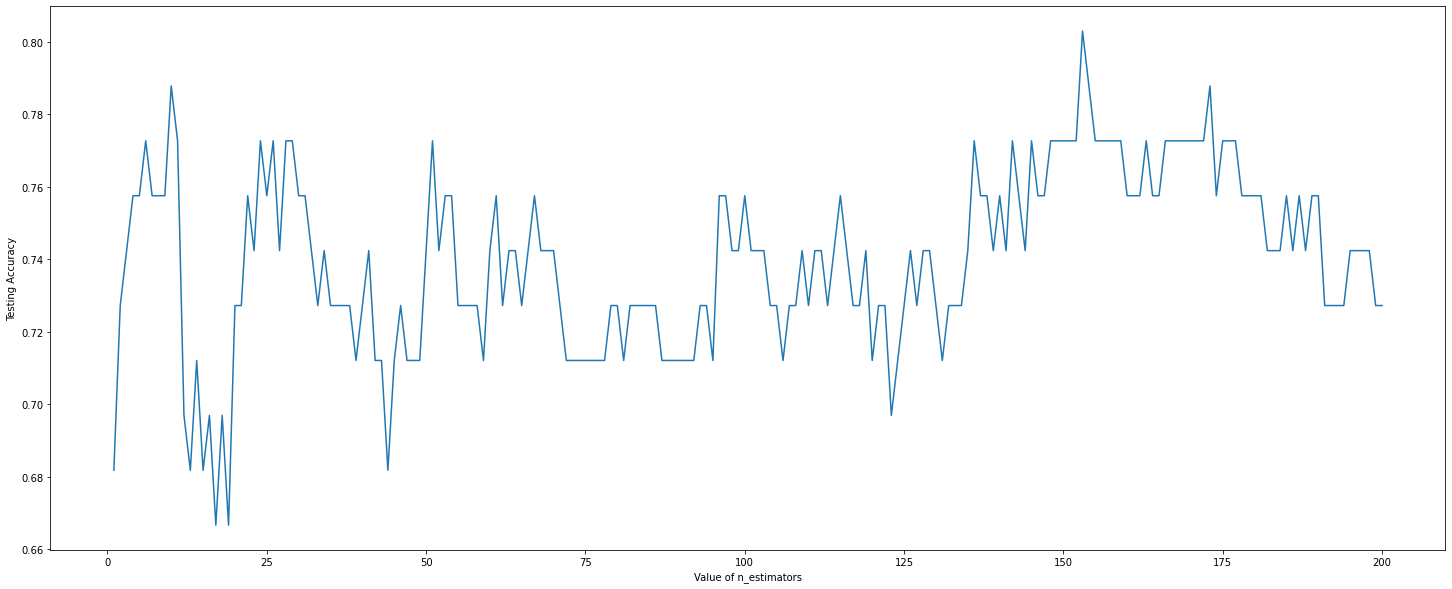

In [13]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [14]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Best Estimator"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 8 19]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.79      0.70      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303




---



---



#Graddient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Boosting Default"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.78      0.67      0.72        27

    accuracy                           0.79        66
   macro avg       0.79      0.77      0.77        66
weighted avg       0.79      0.79      0.78        66

Accurecy:  0.7878787878787878


1/150 round completed......................... Accurecy: 0.6818181818181818
2/150 round completed......................... Accurecy: 0.6818181818181818
3/150 round completed......................... Accurecy: 0.6363636363636364
4/150 round completed......................... Accurecy: 0.6818181818181818
5/150 round completed......................... Accurecy: 0.7121212121212122
6/150 round completed......................... Accurecy: 0.7121212121212122
7/150 round completed......................... Accurecy: 0.7272727272727273
8/150 round completed......................... Accurecy: 0.7575757575757576
9/150 round completed......................... Accurecy: 0.7424242424242424
10/150 round completed......................... Accurecy: 0.7727272727272727
11/150 round completed......................... Accurecy: 0.7575757575757576
12/150 round completed......................... Accurecy: 0.7575757575757576
13/150 round completed......................... Accurecy: 0.7424242424242424
14/150 r

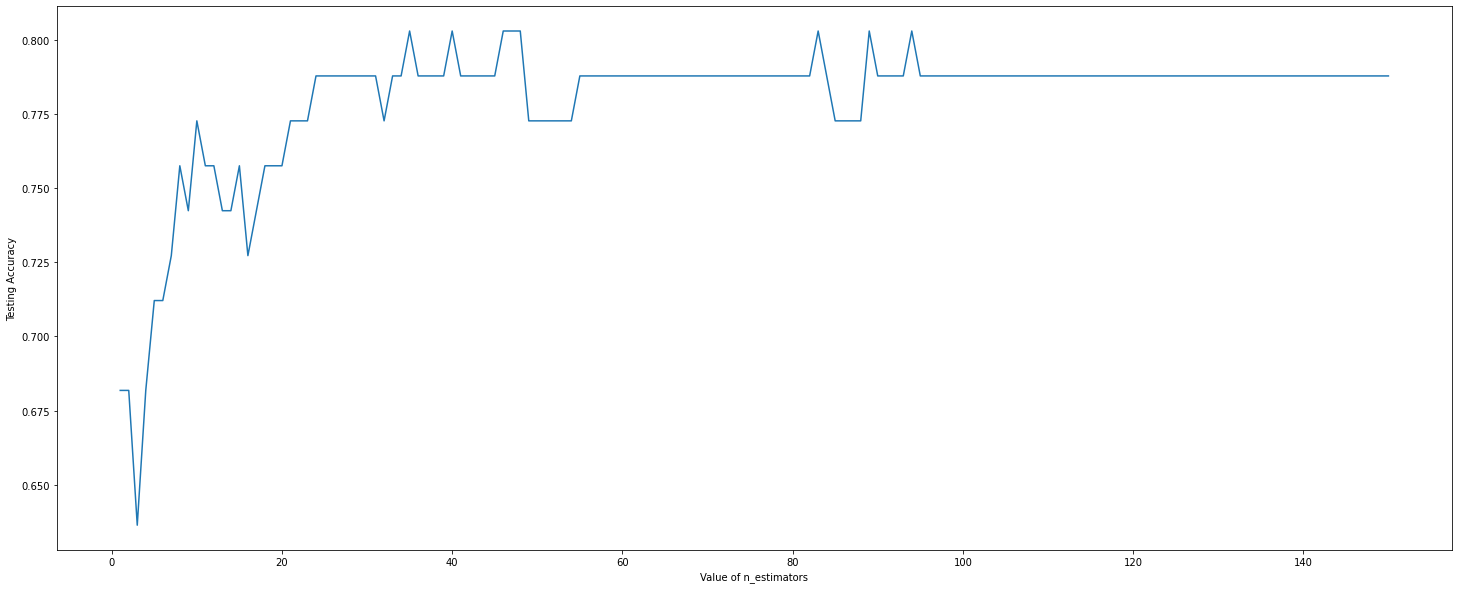

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7575757575757576
2/30 round completed......................... Accurecy: 0.7575757575757576
3/30 round completed......................... Accurecy: 0.7878787878787878
4/30 round completed......................... Accurecy: 0.7424242424242424
5/30 round completed......................... Accurecy: 0.7878787878787878
6/30 round completed......................... Accurecy: 0.6515151515151515
7/30 round completed......................... Accurecy: 0.7575757575757576
8/30 round completed......................... Accurecy: 0.5909090909090909
9/30 round completed......................... Accurecy: 0.6060606060606061
10/30 round completed......................... Accurecy: 0.5909090909090909
11/30 round completed......................... Accurecy: 0.6060606060606061
12/30 round completed......................... Accurecy: 0.5909090909090909
13/30 round completed......................... Accurecy: 0.5909090909090909
14/30 round completed

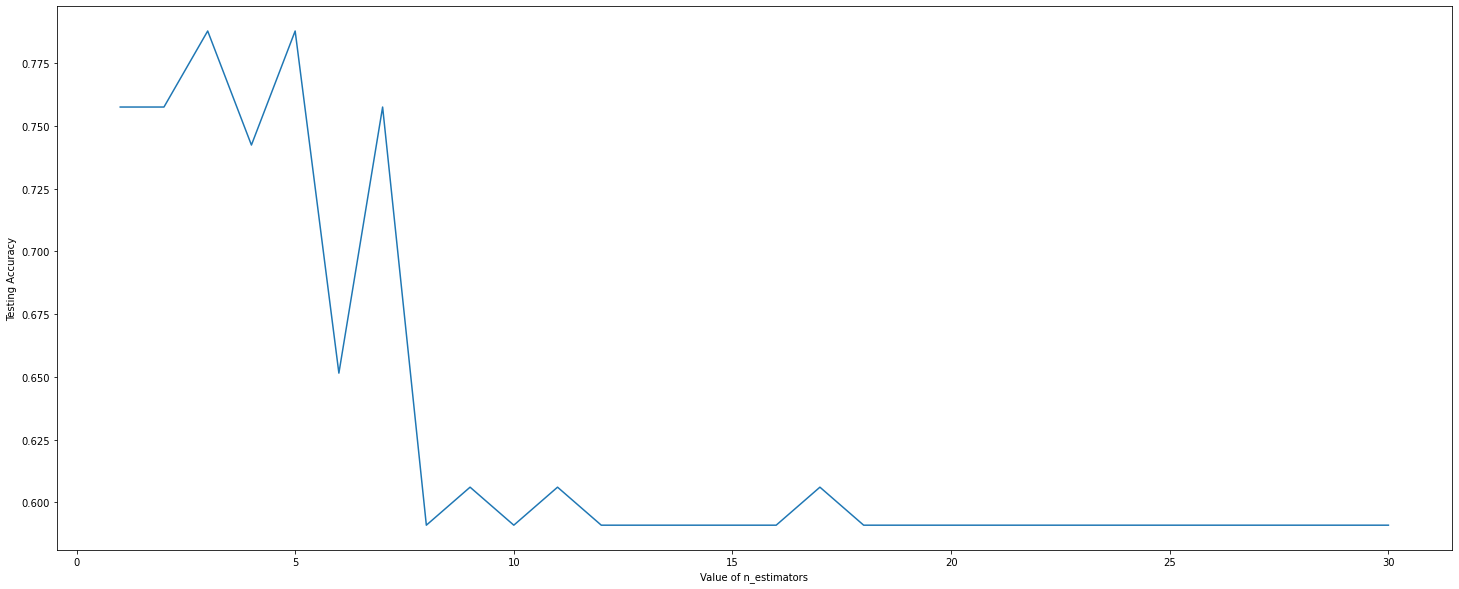

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Best Estimator"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.77      0.74      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boost Best depth"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.78      0.67      0.72        27

    accuracy                           0.79        66
   macro avg       0.79      0.77      0.77        66
weighted avg       0.79      0.79      0.78        66

Accurecy:  0.7878787878787878


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boosting ALL"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.77      0.74      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303




---



---



#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier()
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Default"]=accuracy_score(y_test, y_pred)

[[29 10]
 [13 14]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.72        39
           1       0.58      0.52      0.55        27

    accuracy                           0.65        66
   macro avg       0.64      0.63      0.63        66
weighted avg       0.65      0.65      0.65        66

Accurecy:  0.6515151515151515


1/200 round completed......................... Accurecy: 0.5909090909090909
2/200 round completed......................... Accurecy: 0.6060606060606061
3/200 round completed......................... Accurecy: 0.6363636363636364
4/200 round completed......................... Accurecy: 0.6666666666666666
5/200 round completed......................... Accurecy: 0.6515151515151515
6/200 round completed......................... Accurecy: 0.7272727272727273
7/200 round completed......................... Accurecy: 0.7121212121212122
8/200 round completed......................... Accurecy: 0.7424242424242424
9/200 round completed......................... Accurecy: 0.7424242424242424
10/200 round completed......................... Accurecy: 0.7575757575757576
11/200 round completed......................... Accurecy: 0.7272727272727273
12/200 round completed......................... Accurecy: 0.696969696969697
13/200 round completed......................... Accurecy: 0.6818181818181818
14/200 ro

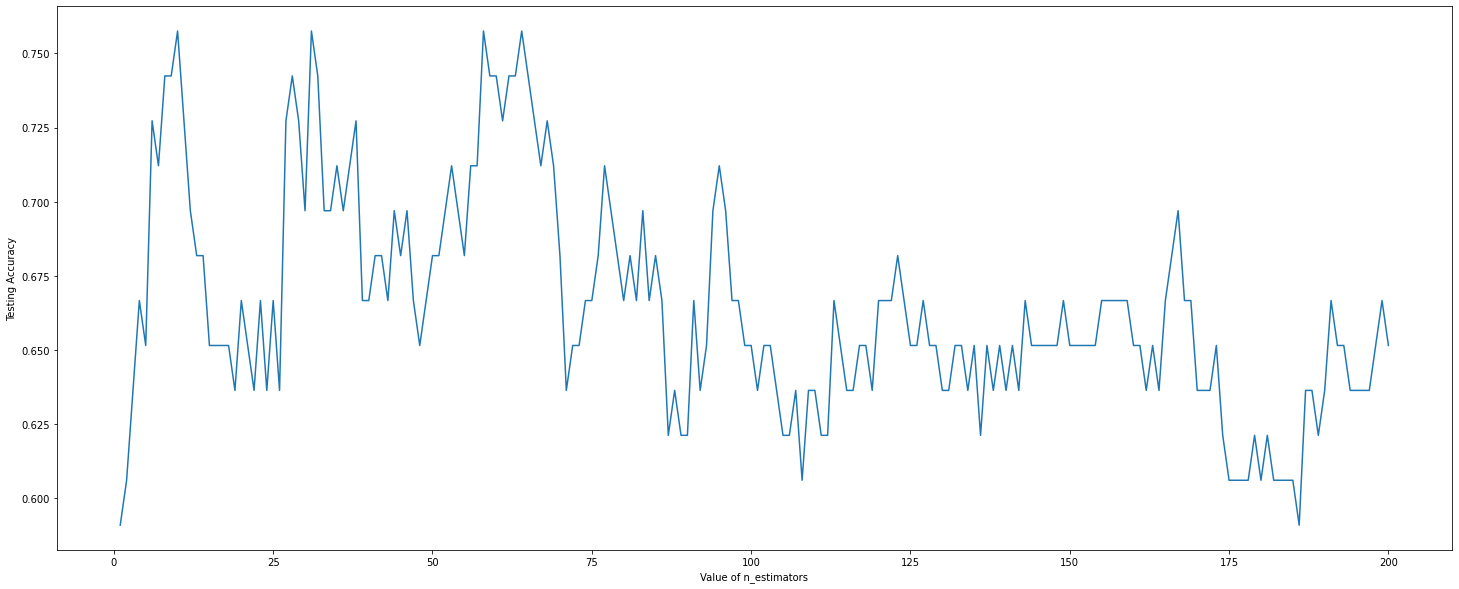

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=200
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=best)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Best Neighbors"]=accuracy_score(y_test, y_pred)

[[37  2]
 [14 13]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        39
           1       0.87      0.48      0.62        27

    accuracy                           0.76        66
   macro avg       0.80      0.72      0.72        66
weighted avg       0.78      0.76      0.74        66

Accurecy:  0.7575757575757576




---



---



#Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Default"]=accuracy_score(y_test, y_pred)

[[32  7]
 [10 17]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        39
           1       0.71      0.63      0.67        27

    accuracy                           0.74        66
   macro avg       0.74      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


1/150 round completed......................... Accurecy: 0.5909090909090909
2/150 round completed......................... Accurecy: 0.5454545454545454
3/150 round completed......................... Accurecy: 0.6060606060606061
4/150 round completed......................... Accurecy: 0.6515151515151515
5/150 round completed......................... Accurecy: 0.7575757575757576
6/150 round completed......................... Accurecy: 0.7575757575757576
7/150 round completed......................... Accurecy: 0.7727272727272727
8/150 round completed......................... Accurecy: 0.7424242424242424
9/150 round completed......................... Accurecy: 0.7727272727272727
10/150 round completed......................... Accurecy: 0.7121212121212122
11/150 round completed......................... Accurecy: 0.7272727272727273
12/150 round completed......................... Accurecy: 0.7424242424242424
13/150 round completed......................... Accurecy: 0.7424242424242424
14/150 r

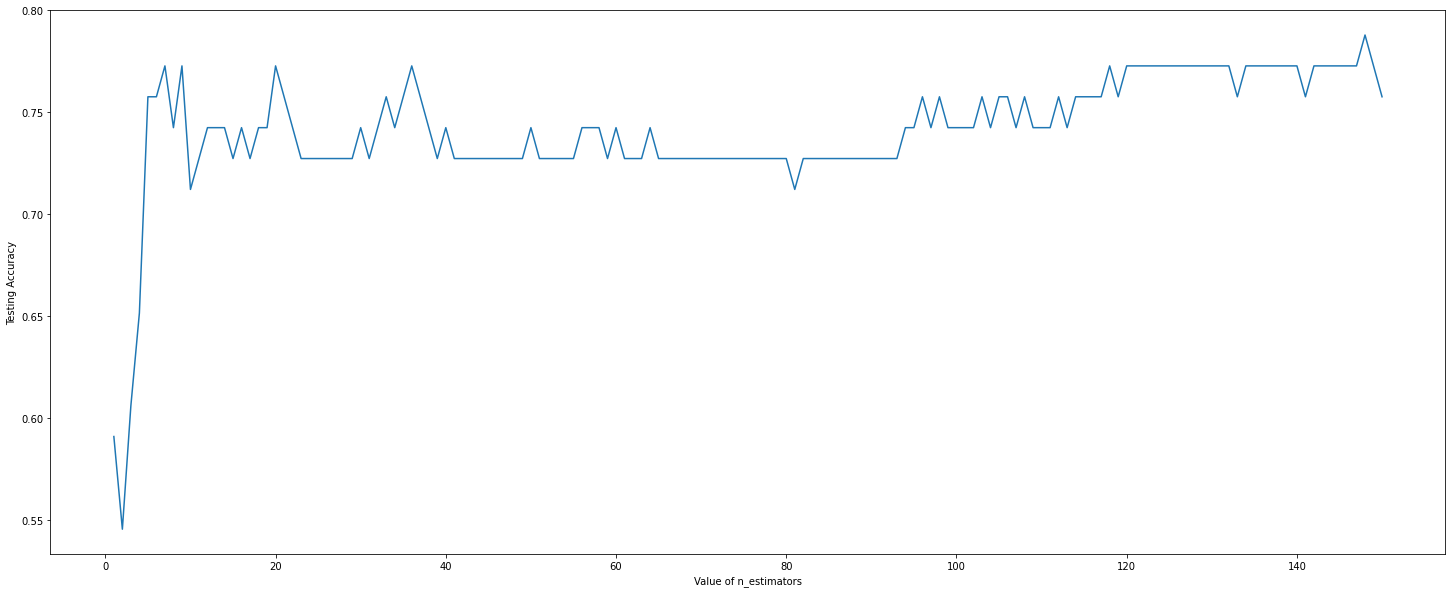

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7121212121212122
2/150 round completed......................... Accurecy: 0.7121212121212122
3/150 round completed......................... Accurecy: 0.7121212121212122
4/150 round completed......................... Accurecy: 0.7272727272727273
5/150 round completed......................... Accurecy: 0.7424242424242424
6/150 round completed......................... Accurecy: 0.7575757575757576
7/150 round completed......................... Accurecy: 0.7727272727272727
8/150 round completed......................... Accurecy: 0.7575757575757576
9/150 round completed......................... Accurecy: 0.7727272727272727
10/150 round completed......................... Accurecy: 0.7424242424242424
11/150 round completed......................... Accurecy: 0.7272727272727273
12/150 round completed......................... Accurecy: 0.7424242424242424
13/150 round completed......................... Accurecy: 0.7272727272727273
14/150 r

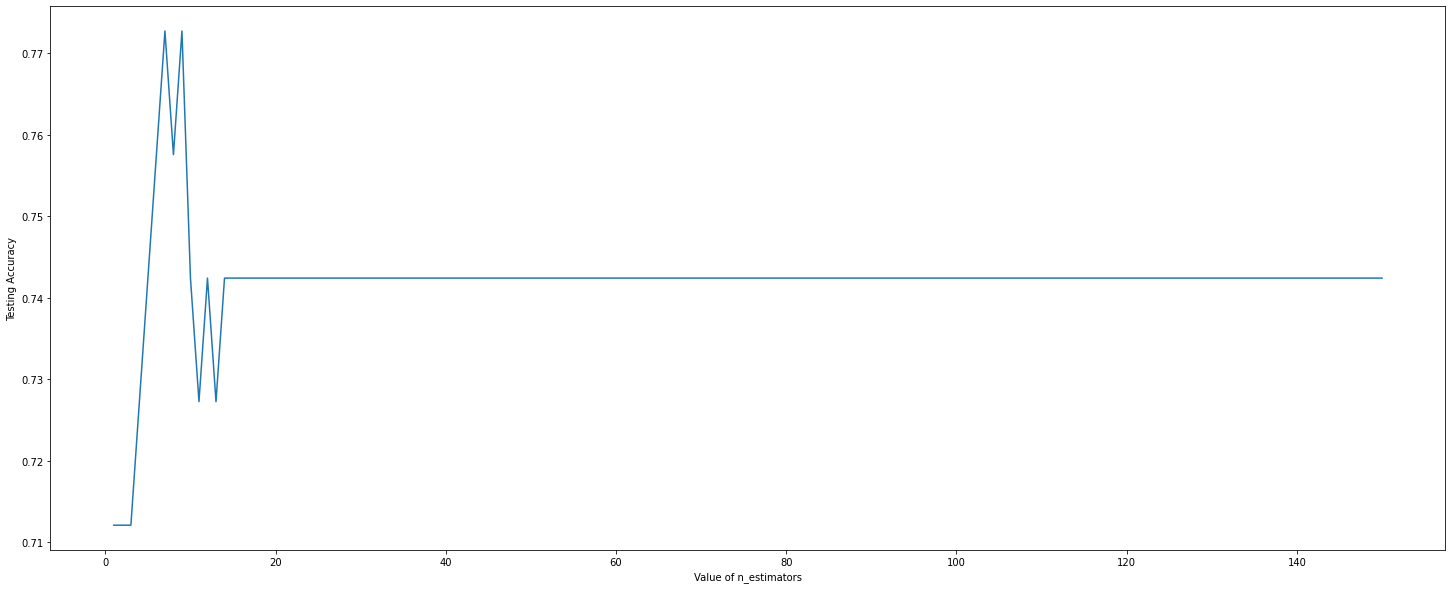

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Estimator"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.78      0.67      0.72        27

    accuracy                           0.79        66
   macro avg       0.79      0.77      0.77        66
weighted avg       0.79      0.79      0.78        66

Accurecy:  0.7878787878787878


In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Max Depth"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.75      0.67      0.71        27

    accuracy                           0.77        66
   macro avg       0.77      0.76      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest All"]=accuracy_score(y_test, y_pred)

[[36  3]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        39
           1       0.86      0.67      0.75        27

    accuracy                           0.82        66
   macro avg       0.83      0.79      0.80        66
weighted avg       0.82      0.82      0.81        66

Accurecy:  0.8181818181818182




---



---



#XGB

In [30]:


import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Deafult"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 8 19]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.79      0.70      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


1/250 round completed......................... Accurecy: 0.6666666666666666
2/250 round completed......................... Accurecy: 0.696969696969697
3/250 round completed......................... Accurecy: 0.6515151515151515
4/250 round completed......................... Accurecy: 0.6818181818181818
5/250 round completed......................... Accurecy: 0.7424242424242424
6/250 round completed......................... Accurecy: 0.7575757575757576
7/250 round completed......................... Accurecy: 0.7727272727272727
8/250 round completed......................... Accurecy: 0.7727272727272727
9/250 round completed......................... Accurecy: 0.7575757575757576
10/250 round completed......................... Accurecy: 0.7272727272727273
11/250 round completed......................... Accurecy: 0.7575757575757576
12/250 round completed......................... Accurecy: 0.7424242424242424
13/250 round completed......................... Accurecy: 0.7575757575757576
14/250 ro

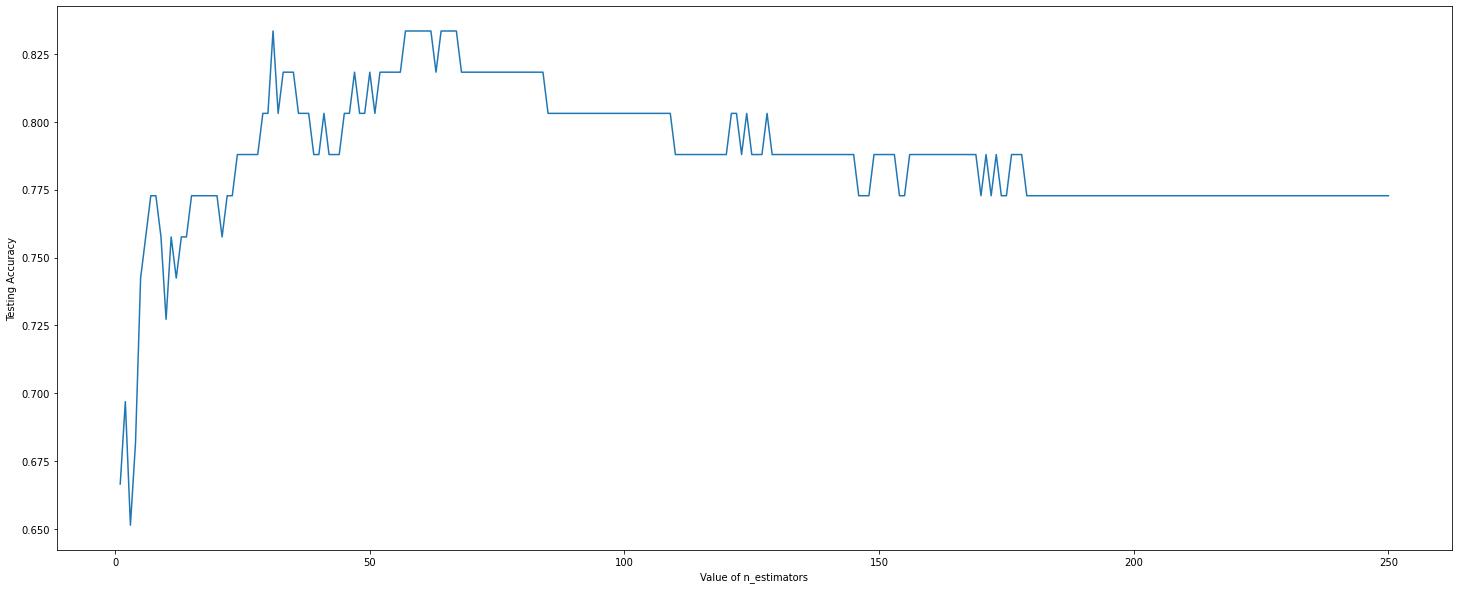

In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7575757575757576
2/250 round completed......................... Accurecy: 0.803030303030303
3/250 round completed......................... Accurecy: 0.803030303030303
4/250 round completed......................... Accurecy: 0.803030303030303
5/250 round completed......................... Accurecy: 0.803030303030303
6/250 round completed......................... Accurecy: 0.7878787878787878
7/250 round completed......................... Accurecy: 0.803030303030303
8/250 round completed......................... Accurecy: 0.8181818181818182
9/250 round completed......................... Accurecy: 0.8181818181818182
10/250 round completed......................... Accurecy: 0.8181818181818182
11/250 round completed......................... Accurecy: 0.8181818181818182
12/250 round completed......................... Accurecy: 0.8181818181818182
13/250 round completed......................... Accurecy: 0.8181818181818182
14/250 round 

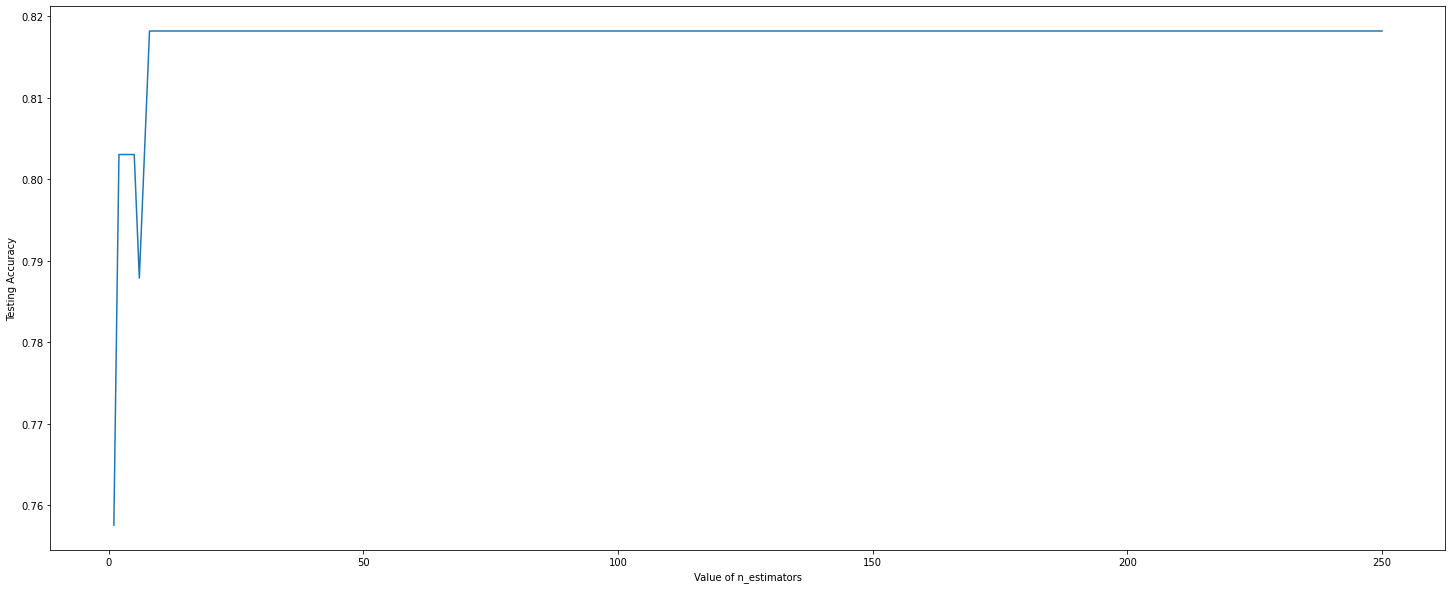

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [33]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Depth"]=accuracy_score(y_test, y_pred)

[[35  4]
 [ 8 19]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.83      0.70      0.76        27

    accuracy                           0.82        66
   macro avg       0.82      0.80      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [34]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Estimator"]=accuracy_score(y_test, y_pred)

[[35  4]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        39
           1       0.83      0.74      0.78        27

    accuracy                           0.83        66
   macro avg       0.83      0.82      0.82        66
weighted avg       0.83      0.83      0.83        66

Accurecy:  0.8333333333333334


In [35]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best ALL"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 9 18]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.75      0.67      0.71        27

    accuracy                           0.77        66
   macro avg       0.77      0.76      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


#NB

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["NB Deafult"]=accuracy_score(y_test, y_pred)

[[28 11]
 [ 8 19]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.63      0.70      0.67        27

    accuracy                           0.71        66
   macro avg       0.71      0.71      0.71        66
weighted avg       0.72      0.71      0.71        66

Accurecy:  0.7121212121212122




---



---



#Result

In [39]:
for i in result:
  print(i," : ",result[i])
  print("---------------------------------------------------------------")

ADA Default  :  0.7424242424242424
---------------------------------------------------------------
ADA Best Estimator  :  0.803030303030303
---------------------------------------------------------------
Graddient Boosting Default  :  0.7878787878787878
---------------------------------------------------------------
Graddient Best Estimator  :  0.803030303030303
---------------------------------------------------------------
Graddient Boost Best depth  :  0.7878787878787878
---------------------------------------------------------------
Graddient Boosting ALL  :  0.803030303030303
---------------------------------------------------------------
KNN Default  :  0.6515151515151515
---------------------------------------------------------------
KNN Best Neighbors  :  0.7575757575757576
---------------------------------------------------------------
Random Forest Default  :  0.7424242424242424
---------------------------------------------------------------
Random Forest Best Estimator  :  0